### Задание 1

Чтобы выполнить задание:
1. Выберите функцию, указанную в таблице
2. Визуализируйте график X1, X2 от -50 до +50.
3. Используйте следующие методы оптимизации: brute force search, gradient descent, simulated annealing, genetic algorythm и pattern search (метод Хука-Дживса). Для выполнения оптимизации разрешается использовать только numpy.
4. Визуализируйте график с точками оптимумов, полученных разными методами.

### Task 1

To complete the task:
1. Choose the function as in the table
2. Visualize the graph of X1, X2 from -50 to +50
3. Use brute force search, gradient descent, simulated annealing, genetic algorythm and pattern search (hooke jeeves). For the optimization sequence you are allowed to use numpy only.
4. Visualize the graph with points of optimums from different methods.6

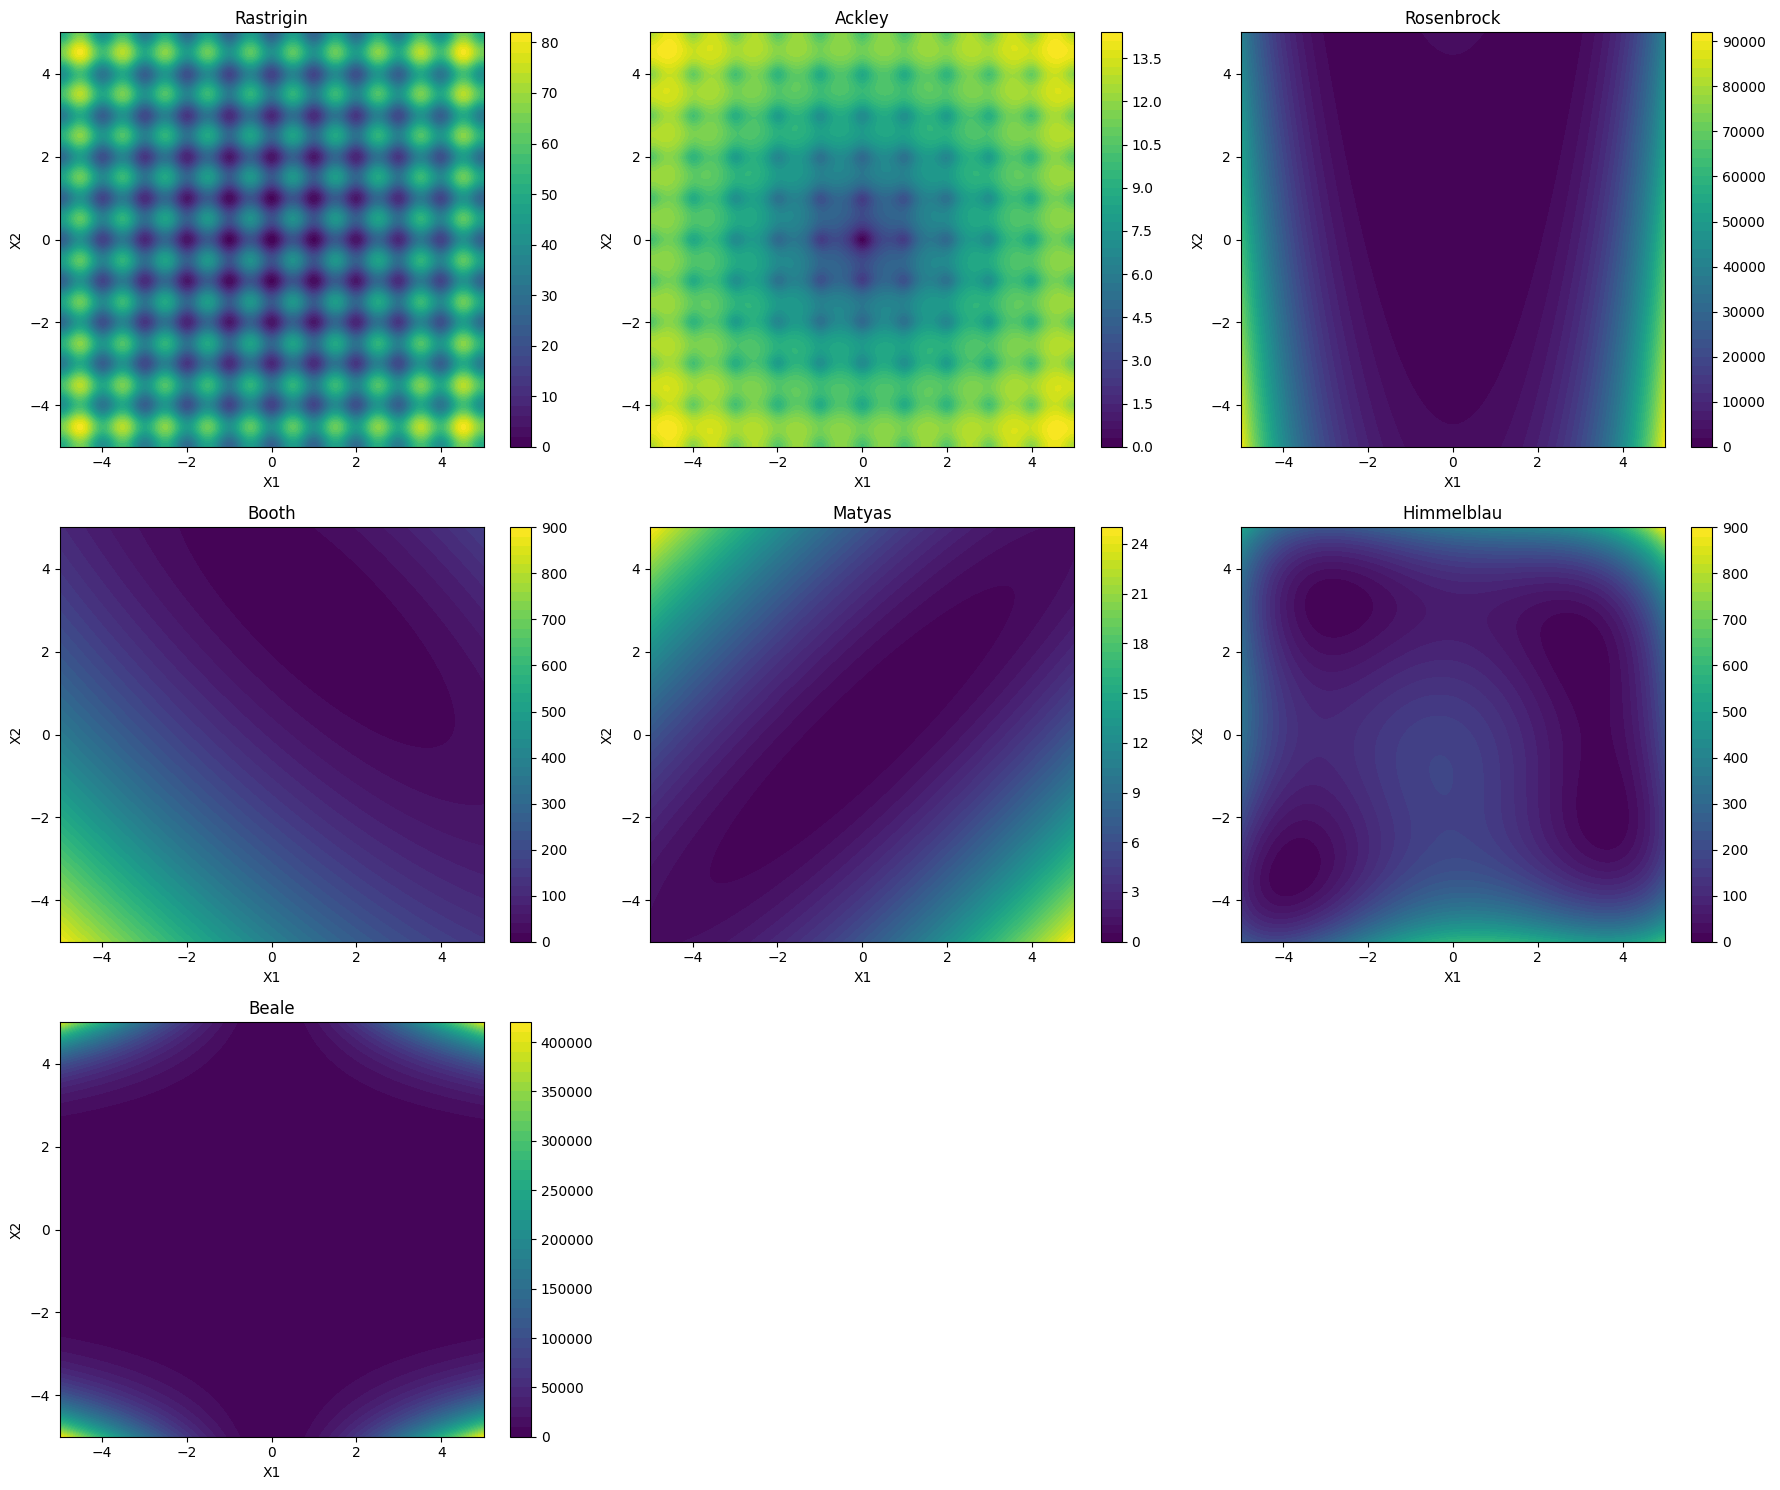

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, sympify, lambdify

# Define symbols
X1, X2 = symbols('X1 X2')
symbolic_functions = {
    "rastrigin": "20 + X1**2 - 10*cos(2*pi*X1) + X2**2 - 10*cos(2*pi*X2)",
    "ackley": "-20*exp(-0.2*sqrt(0.5*(X1**2 + X2**2))) - exp(0.5*(cos(2*pi*X1) + cos(2*pi*X2))) + E + 20",
    "rosenbrock": "(1 - X1)**2 + 100*(X2 - X1**2)**2",
    "booth": "(X1 + 2*X2 - 7)**2 + (2*X1 + X2 - 5)**2",
    "matyas": "0.26*(X1**2 + X2**2) - 0.48*X1*X2",
    "himmelblau": "(X1**2 + X2 - 11)**2 + (X1 + X2**2 - 7)**2",
    "beale": "(1.5 - X1 + X1*X2)**2 + (2.25 - X1 + X1*X2**2)**2 + (2.625 - X1 + X1*X2**3)**2"
}

# Create meshgrid
x = np.linspace(-5, 5, 400)
y = np.linspace(-5, 5, 400)
X, Y = np.meshgrid(x, y)

# Evaluate and plot each function
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.flatten()

for i, (name, expr_str) in enumerate(symbolic_functions.items()):
    expr = sympify(expr_str)
    func = lambdify((X1, X2), expr, modules=['numpy', {'E': np.e, 'pi': np.pi}])
    Z = func(X, Y)
    
    ax = axes[i]
    contour = ax.contourf(X, Y, Z, levels=50, cmap='viridis')
    ax.set_title(name.capitalize())
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    fig.colorbar(contour, ax=ax)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()


# 1. Визуализация функции Розенброка

In [2]:
def rosenbrock(X1, X2):
    return (1 - X1)**2 + 100 * (X2 - X1**2)**2

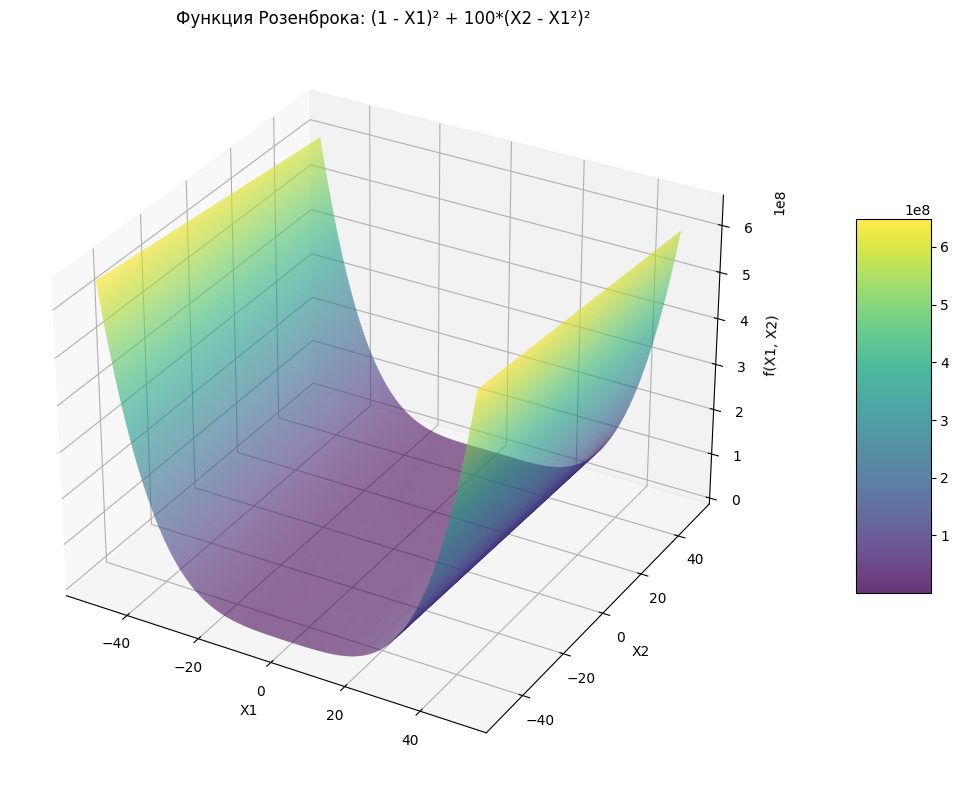

In [13]:
X1 = np.linspace(-50, 50, 1000)
X2 = np.linspace(-50, 50, 1000)

X1, X2 = np.meshgrid(X1, X2)
Z = rosenbrock(X1, X2)

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.8, rstride=1, cstride=1)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('f(X1, X2)')
ax.set_title('Функция Розенброка: (1 - X1)² + 100*(X2 - X1²)²')

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.tight_layout()
plt.show()

# 2. brute force search

In [325]:
def brute_force_search(deep=15, space=1000, x1_range=(-50, 50), x2_range=(-50, 50), func=rosenbrock):
    best_x1, best_x2 = None, None
    min_ = None
    
    new_x1_range = x1_range
    new_x2_range = x2_range
    
    for n in range(deep):
        x1_space = np.linspace(new_x1_range[0], new_x1_range[1], space)
        x2_space = np.linspace(new_x2_range[0], new_x2_range[1], space)
        for i, x1 in enumerate(x1_space):
            for j, x2 in enumerate(x2_space):
                y = func(x1, x2)
                if min_ is None or y <= min_:
                    min_ = y
                    best_x1, best_x2 = x1, x2
        
                    x1_start, x1_end = 0 if i-1 < 0 else i-1, (i+1) % space
                    new_x1_range = (x1_space[x1_start], x1_space[x1_end])
                    
                    x2_start, x2_end = 0 if j-1 < 0 else j-1, (j+1) % space
                    new_x2_range = (x2_space[x2_start], x2_space[x2_end])
                    
    return best_x1, best_x2, min_

print(brute_force_search())

(np.float64(0.8073639204770369), np.float64(0.650650650650654), np.float64(0.0372492830227949))


# 3. gradient descent

In [233]:
def rosenbrock_grad(X1, X2):
    df_dx1 = -2 * (1 - X1) - 400 * X1 * (X2 - X1**2)
    df_dx2 = 200 * (X2 - X1**2)
    
    return np.array([df_dx1, df_dx2])

def gradient_descent(a=0.0001, n=150000, start=(5, 5), func=rosenbrock):
    best_x1, best_x2 = start
    
    for i in range(n):
        gradient = rosenbrock_grad(best_x1, best_x2)
        best_x1 -= a*gradient[0]
        best_x2 -= a*gradient[1]
        
    return best_x1, best_x2, func(best_x1, best_x2)

print(gradient_descent())
    

(np.float64(1.0377838839545785), np.float64(1.0771431864134537), np.float64(0.0014298062707105632))


# 4. simulated annealing

In [291]:
def simulated_annealing(min_T=10e-10, T=100000, a=0.99, start=(5, 5), func=rosenbrock):
    rng = np.random.RandomState(2) 
    
    x1_best, x2_best = start
    
    while T > min_T:
        new_x1 = x1_best + rng.normal(0, 0.1)
        new_x2 = x2_best + rng.normal(0, 0.1)
        
        delta = func(new_x1, new_x2) - func(x1_best, x2_best)
        if delta < 0:
            x1_best = new_x1
            x2_best = new_x2
            
        elif rng.random() < np.exp(-delta/T):
                x1_best = new_x1
                x2_best = new_x2
        
        T = a * T
    
    return x1_best, x2_best, func(x1_best, x2_best)
            
print(simulated_annealing())

(0.9998016862256606, 0.9999035040833033, 9.044867422831168e-06)


# 5. genetic algorythm

In [279]:
def genetic_algorythm(n=1000, a=0.5, mr=0.1, population_size=50, space=(-50, 50), func=rosenbrock):
    rng = np.random.RandomState(100) 
    
    population = rng.uniform(*space, size=(population_size, 2))
    scores = -func(population[:,0], population[:,1])
    
    for _ in range(n):
        parents = []
        for _ in range(population_size):
            tournament = rng.choice(population_size, size=3)
            winner = tournament[np.argmax(scores[tournament])]
            parents.append(population[winner])
            
        children = []
        for i in range(0, population_size, 2):
            if rng.random() < a:
                alpha = rng.random()
                child1 = alpha * parents[i] + (1 - alpha) * parents[i+1]
                child2 = alpha * parents[i+1] + (1 - alpha) * parents[i]
                children.extend([child1, child2])
            else:
                children.extend([parents[i], parents[i+1]])
            
        for i in range(population_size):
            if rng.random() < mr:
                children[i] += rng.normal(0, 0.1, size=2)
                children[i] = np.clip(children[i], *space)
                
        population = np.array(children)
        scores = -func(population[:,0], population[:,1])
    
    best_idx = np.argmax(scores)
    return *population[best_idx], func(*population[best_idx])
                
print(genetic_algorythm())

(np.float64(1.0000530222563504), np.float64(1.000243077944181), np.float64(1.8805504447352575e-06))


# 6. pattern search (метод Хука-Дживса)

In [246]:
def generate_pattern(n):
    pattern = []
    for i in range(n):
        d = np.zeros(n)
        d[i] = 1
        pattern.extend([d, -d])
    return pattern

def pattern_search(n=100000, x_0=(-50, 50), delta=0.1, func=rosenbrock):
    states = x_0
    delta = delta
    pattern = generate_pattern(len(states)) 
    
    for _ in range(n):
        updated = False
        for d in pattern:
            if func(*states + d*delta) < func(*states):
                states = states + d*delta
                updated = True
                
        if updated:
            delta = 2*delta
        else:
            delta = 0.5*delta
            
    return *states, func(*states)

print(pattern_search())

(np.float64(1.0000000000000444), np.float64(1.0000000000000888), np.float64(1.9721522630525295e-27))


# 7. Визуализция графиков с точками оптимумов, полученных разными методами.

In [327]:
optimizers = { "brute force search": [brute_force_search, "o", "red"],
               "gradient descent": [gradient_descent, "s", "blue"],
               "simulated annealing": [simulated_annealing, "D", "green"],
               "genetic algorithm": [genetic_algorythm, "^", "purple"],
               "pattern search": [pattern_search, "*", "brown"] }

Функция: brute force search, x1: 0.8073639204770369, x2: 0.650650650650654, y: 0.0372492830227949
Функция: gradient descent, x1: 1.0377838839545785, x2: 1.0771431864134537, y: 0.0014298062707105632
Функция: simulated annealing, x1: 0.9998016862256606, x2: 0.9999035040833033, y: 9.044867422831168e-06
Функция: genetic algorithm, x1: 1.0000530222563504, x2: 1.000243077944181, y: 1.8805504447352575e-06
Функция: pattern search, x1: 1.0000000000000444, x2: 1.0000000000000888, y: 1.9721522630525295e-27


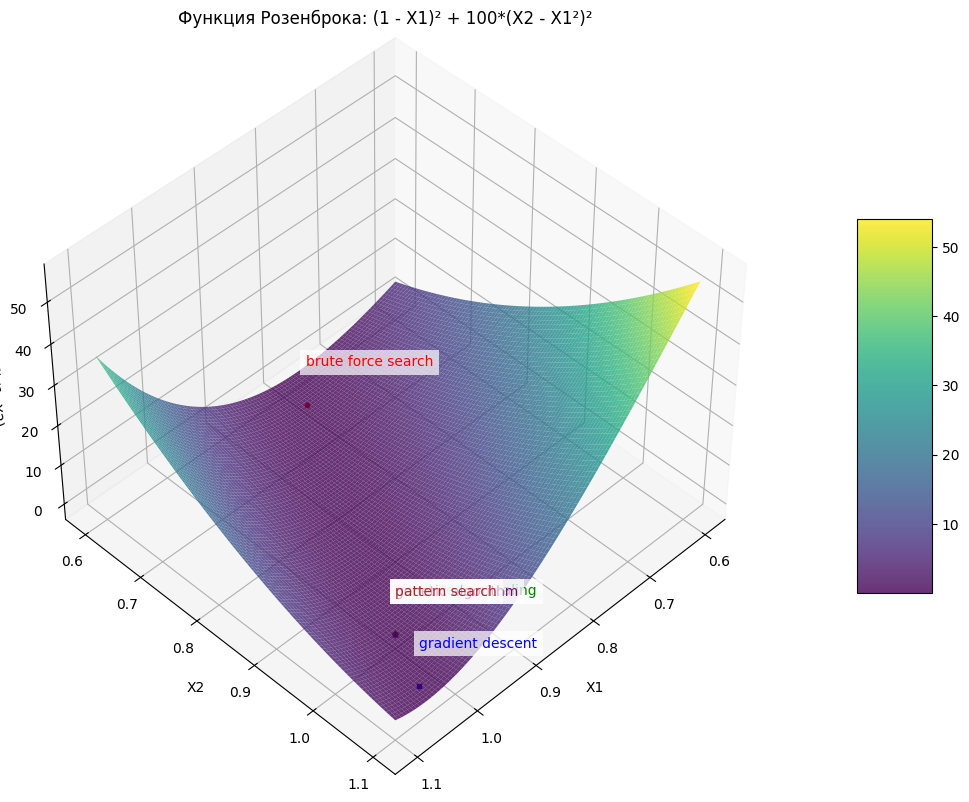

In [334]:
X1 = np.linspace(0.6, 1.1, 100)
X2 = np.linspace(0.6, 1.1, 100)

X1, X2 = np.meshgrid(X1, X2)
Z = rosenbrock(X1, X2)

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X1, X2, Z, cmap='viridis', alpha=0.8, rstride=1, cstride=1)
fig.colorbar(surf, shrink=0.5, aspect=5)

for name, (func, marker, color) in optimizers.items():
    x1, x2, y = func()
    print(f"Функция: {name}, x1: {x1}, x2: {x2}, y: {y}")
    ax.scatter(
        [x1], [x2], [y],
        color=color,
        marker=marker,
        s=10,
        depthshade=False,
        label=name,
        zorder=10
    )

    ax.text(x1, x2, y+10, name, 
           color=color,
           fontsize=10,
           bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'),
           zorder=11)

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('f(X1, X2)')
ax.set_title('Функция Розенброка: (1 - X1)² + 100*(X2 - X1²)²')

ax.view_init(elev=45, azim=45)
plt.tight_layout()
plt.show()

# Вывод
В ходе лабораторной работы были рассмотрены основные методы оптимизации. Механизм работы методов был реализован и протестирован на примере функции Розенброка. В результате работы самым точным методом по поиску оптимумов функции оказался метод Хука-Дживса. Далее идут генетический метод и метод сплава, тут стоит отметить, что результат работы этих методов сильно зависит от рандома, поэтому для достижения хорошего результата пришлось поиграться с seed рандома и впоследствии его зафиксировать для воспроизведения результата. Метод градиентного спуска часто выдавал ошибку переполнения, так что вероятнее всего при более грамотной реализации метода и подборе оптимальных гиперпараметров можно заметно улучшить результат его работы. И наконец метод брут форс - самый вычислительно затратный метод, но тоже жизнеспособный как показывает практика.  